<a href="https://colab.research.google.com/github/SaidAmiri0/New-Project/blob/main/Support_Vector_Machine_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the Data**

The data set is a compressed (gzip) NDJSON file.

In [ ]:
import gzip
import json
from pathlib import Path

The datasets are imported from Google Drive. It's about a classification of companies' landing pages by industry sector. 

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')
data_path = Path('/gdrive/MyDrive/industry_data/')
file_name1 = 'train_small.ndjson.gz'
file_name2 = 'test_small.ndjson.gz'

Mounted at /gdrive


Importing the whole train file 

In [ ]:
# open train file
with gzip.open(data_path/file_name1, "rt", encoding='UTF-8') as file:
    data1 = [json.loads(line) for line in file]

Importing the whole test file

In [ ]:
# open test file
with gzip.open(data_path/file_name2, "rt", encoding='UTF-8') as file:
    data2 = [json.loads(line) for line in file]

**Data Visualization**

*Training Dataset*

The train file is a list of dictionaries, each dictionary is comprised of 4 keys 
which are: html, industry, industry_label, and url.

In [ ]:
example1 = data1[0]
example1 

{'html': '<!doctype html>\n<html lang="de">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n\t\t<title>Kaiser Personal Service</title>\n\n\t\t<link rel="stylesheet" href="/css/fonts.css?ts=1601589832">\n\t\t<link rel="stylesheet" href="/css/kps.css?ts=1612182547">\n\n\t\t<script type="text/javascript" src="/js/MooTools-Core-1.6.0.js"></script>\n\t\t<script type="text/javascript" src="/js/MooTools-More-1.6.0.js"></script>\n\t</head>\n\t<body>\n\t\t<div id="header">\n\t\t\t<a href="/" class="startpagelink"><img id="headerlogo" src="/graphics/KPS-Logo.png"></a>\n\t\t\t<div id="sysmenu">\n<!-- \t\t\t\t<a href="/agb/">AGB</a> -->\n\t\t\t\t<a href="/impressum/" class="">Impressum</a>\n\t\t\t\t<a href="/datenschutz/" class="">Datenschutz</a>\n\t\t\t</div>\n\t\t\t<div id="mainmenu">\n\t\t\t\t<a href="/bewerbung/" class="active">Bewerbung</a>\n\t\t\t\t<a href="/kpsda/" class="">KPS Darmstadt</a>\n\t\t\t\t<a href="/kpsrh/" clas

In [ ]:
# keys
example1.keys()

dict_keys(['url', 'html', 'industry', 'industry_label'])

Transformation of the train file constructed before as a list of dictionaries to a dataframe.

In [ ]:
import pandas as pd
data_train = pd.DataFrame(data1)

In [ ]:
data_train.shape 

(25185, 4)

In [ ]:
data_train.head()

,url,html,industry,industry_label
0,http://www.kaiser-personal-service.de,"<!doctype html>\n<html lang=""de"">\n\t<head>\n\...",137,Human Resources
1,http://www.brandseven.com,"<!DOCTYPE html>\n<html class=""html"" lang=""de-D...",96,Information Technology and Services
2,http://www.beumergroup.com,"<!DOCTYPE html>\n<html class=""home page-templa...",135,Mechanical or Industrial Engineering
3,http://www.aurigavision.com,<!doctype html>\n<!--[if IE 8]> <html ...,13,Medical Practice
4,http://www.comme-a-la-maison.ch,"<!DOCTYPE html>\n<html lang=""fr"">\n<head>\n\n<...",48,Construction


Exploration of the distribution of the different classes in the training dataset. There are 19 industry classes.

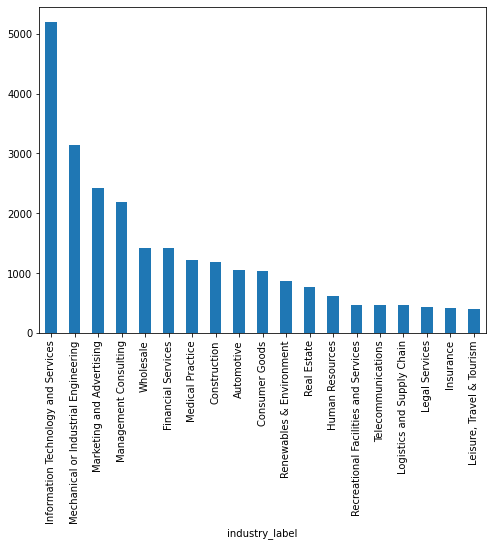

In [ ]:
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(8,6))
data_train.groupby(['industry_label']).size().sort_values(ascending=False).plot.bar()
plt.show()

In [ ]:
data_train['industry_label'].value_counts()

Information Technology and Services     5191
Mechanical or Industrial Engineering    3147
Marketing and Advertising               2418
Management Consulting                   2192
Financial Services                      1414
Wholesale                               1414
Medical Practice                        1217
Construction                            1191
Automotive                              1050
Consumer Goods                          1040
Renewables & Environment                 874
Real Estate                              764
Human Resources                          619
Recreational Facilities and Services     469
Telecommunications                       466
Logistics and Supply Chain               463
Legal Services                           439
Insurance                                418
Leisure, Travel & Tourism                399
Name: industry_label, dtype: int64

The training dataset is imbalanced. It comprises 25185 observations, in which the "Information Technology and Services" class is the most frequent one with 5191 observations, and the "Leisure, Travel & Tourism" class has the minimum occurrence with only 399 observations.

In [ ]:
# Number of words in the training dataset
print(data_train['html'].apply(lambda x: len(x.split(' '))).sum())

395211490


There are nearly 395 million words in the 'html' column relative to the train set. 

*Test Dataset*

The test file is also a list of dictionaries, each dictionary comprises 4 keys which are: html, industry, industry_label, and url.

In [ ]:
example2 = data2[0]
example2

{'html': '<!-- HTML --><!DOCTYPE html><html lang="de" xmlns="http://www.w3.org/1999/xhtml"><head>\n<meta content="ad5ef4c6-83e0-425a-a257-e16bdb6590e9" name="csrf-token" />\n   <title>Elektromarkt in Ihrer Nähe mit Online-Shop – expert</title> <meta name="description" content="Finden Sie hier Ihren expert Elektrofachmarkt in Ihrer Nähe und viele Aktionsangebote ✔ günstig im expert Online-Shop. expert – Mit den besten Empfehlungen."> <meta charset="utf-8"/> <meta http-equiv="X-UA-Compatible" content="IE=edge"/> <meta content="width=device-width, initial-scale=1, maximum-scale=2" name="viewport"/>       <link rel="stylesheet" type="text/css" href="/static/resources/private/css/frontend.css?ver=8"/>                       <link rel="alternate" hreflang="de-AT" href="https://www.expert.at">  <link rel="alternate" hreflang="de-DE" href="https://www.expert.de">      <meta property="ak_screentype" content="home">  <meta property="pagetype" content="Start">  <meta name="facebook-domain-verifica

In [ ]:
# keys
example2.keys()

dict_keys(['url', 'html', 'industry', 'industry_label'])

Transformation of the test file constructed before as a list of dictionaries to a dataframe.

In [ ]:
import pandas as pd
data_test = pd.DataFrame(data2) 

In [ ]:
data_test.shape 

(8396, 4)

In [ ]:
data_test.head()

,url,html,industry,industry_label
0,http://www.expert.de,"<!-- HTML --><!DOCTYPE html><html lang=""de"" xm...",133,Wholesale
1,http://www.weight-watchers.de,"<!doctype html><html lang=""de"" xmlns=""http://w...",13,Medical Practice
2,http://www.sk-rade.de,"<!DOCTYPE html>\r\n\t\t<html lang=""de"" class=""...",43,Financial Services
3,http://www.getahead.de,"<!DOCTYPE html>\n<!-- HTML5 -->\n<html lang=""d...",137,Human Resources
4,http://www.pfalzwerke-netz.de,"<!doctype html>\n<html class=""no-js"" lang=""de""...",144,Renewables & Environment


Exploration of the distribution of the different classes in the test dataset. There are also 19 industry classes.

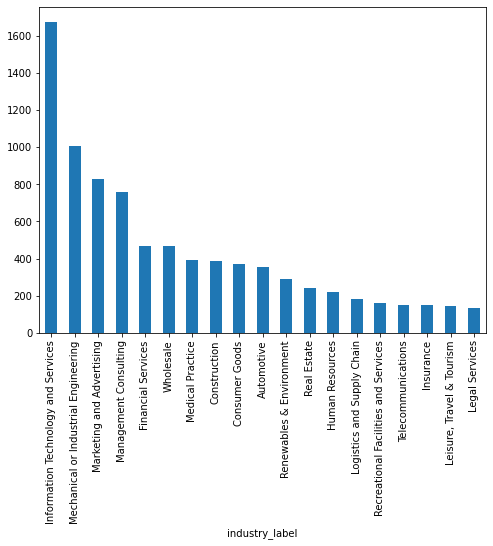

In [ ]:
fig1 = plt.figure(figsize=(8,6))
data_test.groupby(['industry_label']).size().sort_values(ascending=False).plot.bar()
plt.show()

In [ ]:
data_test['industry_label'].value_counts()

Information Technology and Services     1671
Mechanical or Industrial Engineering    1004
Marketing and Advertising                830
Management Consulting                    759
Financial Services                       469
Wholesale                                468
Medical Practice                         395
Construction                             390
Consumer Goods                           372
Automotive                               356
Renewables & Environment                 290
Real Estate                              240
Human Resources                          218
Logistics and Supply Chain               183
Recreational Facilities and Services     163
Telecommunications                       153
Insurance                                152
Leisure, Travel & Tourism                148
Legal Services                           135
Name: industry_label, dtype: int64

The test dataset is also imbalanced. It is comprised of 8396 observations, in which the "Information Technology and Services" class is the most frequent with 1671 observations, and the "Legal Services" class has the minimum occurrence with only 135 observations.

In [ ]:
# Number of words in the test dataset
print(data_test['html'].apply(lambda x: len(x.split(' '))).sum())

135251555


There are nearly 135 million words in the 'html' column relative to the test set.

**Data Cleaning**

The landing pages of companies are classified based on their html files. In order to get a better accuracy, one needs to clean these html files to obtain proper texts that are well-prepared for training and testing. So, the html is decoded by usig the "BeautifulSoup" command, and the punctuations that are not relevant for the training process are removed. 

In [ ]:
import string
from bs4 import BeautifulSoup
PUNCT_TO_REMOVE = string.punctuation
def cleaning_text(text):
    """custom function to remove the punctuation"""
    text = text.replace('\n', ' ') 
    text = BeautifulSoup(text, 'html.parser').text # HTML decoding
    text = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    return text

*Training Dataset after Cleaning*

In [ ]:
data_train['html'] = data_train['html'].apply(cleaning_text)
data_train.tail()

,url,html,industry,industry_label
25180,http://www.starkhomes.com,South Central Wisconsin Real E...,44,Real Estate
25181,http://www.hotel-konsul.de,Hotel Konsul Hotel Konsul ...,30,"Leisure, Travel & Tourism"
25182,http://www.suva.ch,Suva Unfallv...,42,Insurance
25183,http://www.wiegandsystem.de,asynchide opacity 0 important functionasy...,13,Medical Practice
25184,http://www.coresystems.net,SAP Field Service Management l field se...,96,Information Technology and Services


In [ ]:
# Number of words in the training dataset
print(data_train['html'].apply(lambda x: len(x.split(' '))).sum())

170234367


More than one half of the html content is cleaned.

*Test Dataset after Cleaning*

In [ ]:
data_test['html'] = data_test['html'].apply(cleaning_text)
data_test.tail()

,url,html,industry,industry_label
8391,http://www.lovatoelectric.de,\r \tLovato Electric Energy and Automa...,25,Consumer Goods
8392,http://www.hollflachdachbau.de,Startseite Holl Flachdachbau ...,48,Construction
8393,http://www.q-park.de,﻿\r \r dataLayer pagelanguagedetypehom...,44,Real Estate
8394,http://www.jrs.de,JRS J Rettenmaier Söhne GmbH Co KG docum...,13,Medical Practice
8395,http://www.spelsberg.de,functionwdsliwlwlwlpus...,25,Consumer Goods


In [ ]:
# Number of words in the test dataset
print(data_test['html'].apply(lambda x: len(x.split(' '))).sum())

58947648


Nearly one thrid of the html content is cleaned.

**Train the Model through a Pipeline**

sklearn.feature_extraction.text.TfidfVectorizer is used to calculate a tf-idf vector for each observation in the column 'html', in which:

*   sublinear_df is set to True to use a logarithmic form for frequency.
*   min_df is the minimum numbers of documents a word must be present in to be kept.
*   norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
*   ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
*   stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

Then, the Support Vector Machine (SVM) Model is used to fit the train dataset.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
SVM = Pipeline([
    ('tfidf', TfidfVectorizer(sublinear_tf=True, min_df=50, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')),
    ('SVM', LinearSVC())
    ])

In [ ]:
SVM.fit(data_train.html,data_train.industry_label)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(encoding='latin-1', min_df=50,
                                 ngram_range=(1, 2), stop_words='english',
                                 sublinear_tf=True)),
                ('SVM', LinearSVC())])

**Evaluate the Model**

In [ ]:
predictions = SVM.predict(data_test.html)

The model has been evaluated using the classification report.

In [ ]:
from sklearn import metrics
import pandas as pd
lr_report = metrics.classification_report(data_test.industry_label, 
                                           predictions,  
                                           output_dict=True)
pd.DataFrame(lr_report).T

,precision,recall,f1-score,support
Automotive,0.800000,0.629213,0.704403,356.000000
Construction,0.683784,0.648718,0.665789,390.000000
Consumer Goods,0.650350,0.500000,0.565350,372.000000
Financial Services,0.829157,0.776119,0.801762,469.000000
Human Resources,0.757062,0.614679,0.678481,218.000000
Information Technology and Services,0.662245,0.836625,0.739291,1671.000000
Insurance,0.781022,0.703947,0.740484,152.000000
Legal Services,0.912000,0.844444,0.876923,135.000000
"Leisure, Travel & Tourism",0.911111,0.831081,0.869258,148.000000
Logistics and Supply Chain,0.847328,0.606557,0.707006,183.000000


*   f1-score is the harmonic mean between precision and recall.
*   Recall is the number of correctly predicted elements of a class out of the number of actual/true elements of that class.
*   Precision is the number of correctly predicted elements of a class out of all predicted elements of that class.
*   Support is the number of occurence of the given class in the test dataset.

The "Telecommunications" class has the lowest recall with only 0,32. This means that the percentage of the correctly predicted elements of the "Telecommunications" class out of its true elements is nearly 32%.




The Confusion Matrix is displayed below to get a deeper look on the 
correctly-predicted elements and the actual/true ones of each class

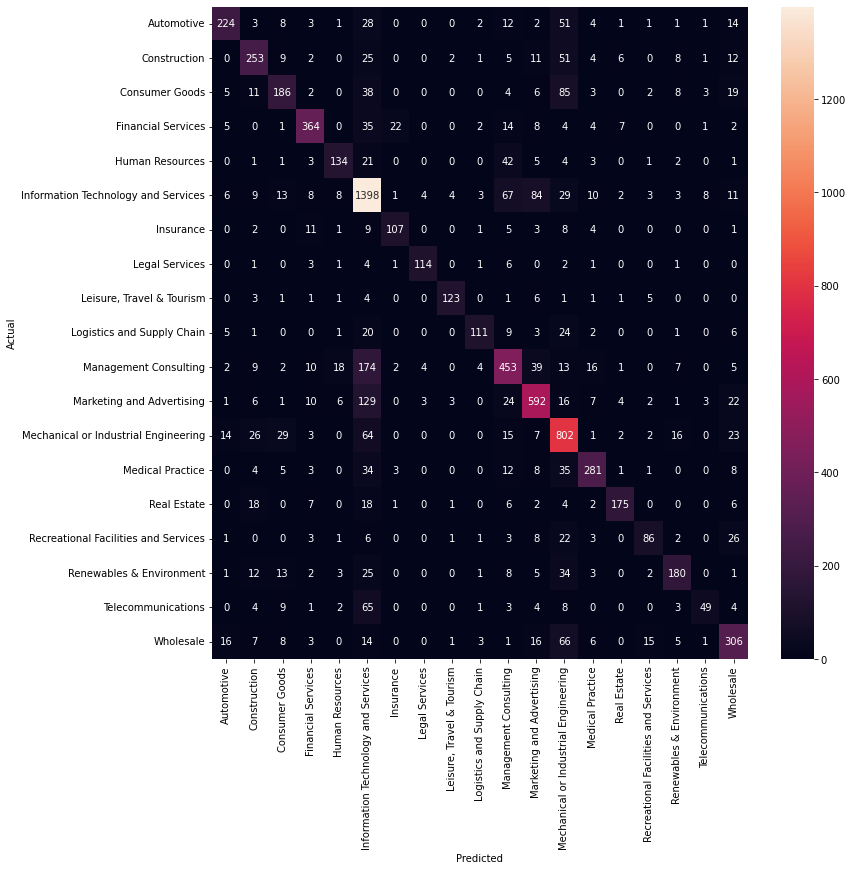

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
unique_label = np.unique(data_test.industry_label)
conf_mat = confusion_matrix(data_test.industry_label, predictions)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=unique_label, yticklabels=unique_label)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

*   The lowest recall relating to the "Telecommunications" class is confirmed by the confusion matrix, since only 49 elements out of 153 are being correctly predicted in this class.
*   The "Legal Services" class has the highest recall by nearly 0,84. There are 114 elements in this class out of 135 true elements that are correctly predicted.    
*   174 elements that belong in reality to the "Management Consulting" class, are incorrectly predicted as belonging to the "Information Technology and Services" class. 





**Using the trained model for inference**

Selenium Scraper

In [ ]:
#Download the libraries needed to use Selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/grap

In [ ]:
# Import libraries
from selenium import webdriver
from bs4 import BeautifulSoup

In [ ]:
#Settings for using the driver without a UI
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
#options.add_argument('--disable-dev-shm-usage')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36")
driver = webdriver.Chrome('chromedriver',options=options)
driver.implicitly_wait(10)

Example 1

In [ ]:
# Test download
url = 'https://www.expert.de/'
driver.get(url)
html = driver.page_source.encode('utf-8')
Cleaned_text_1 = cleaning_text(str(html))
Cleaned_text_1

'bnnnnnnnnnnnnnnnnnnnnnnnnnnnnElektromarkt in Ihrer Nxc3xa4he mit OnlineShop xe2x80x93 expert                              windowdataLayer  windowdataLayer  function gtag dataLayerpusharguments gtagconsent default adstorage deniedanalyticsstorage deniedfunctionalitystorage deniedpersonalizationstorage deniedsecuritystorage grantedwaitforupdate 500gtagset adsdataredaction truefunctiondoLogConsentfunction logConsentpreferenceajaxurlapiuseraddPreferencetypePOSTcontentTypeapplicationjsoncharsetutf8dataTypejsondataJSONstringifypreferencepreferenceprivacyPreferenceInfoCookiebotRenderPostProcessorfunction getCookieJsonreturn requiredCookiebotconsentnecessarystatisticCookiebotconsentstatisticsmarketingCookiebotconsentmarketingpreferencesCookiebotconsentpreferencesfunction assignCookieCookiessetUserCookiePermissionsgetCookieJsonfunction cookiebotEventiftypeof Cookiesfunctionvar beforeCookiesgetUserCookiePermissionsassignCookievar afterCookiesgetUserCookiePermissionsifbeforeafter  doLogConsentlo

In [ ]:
prediction = SVM.predict([Cleaned_text_1])
prediction

array(['Wholesale'], dtype=object)

Example 2

In [ ]:
# Test download
url = 'https://www.ING.de/'
driver.get(url)
html = driver.page_source.encode('utf-8')
Cleaned_text_2 = cleaning_text(str(html))
Cleaned_text_2

'bnnwindowGCO  nnnnnnnnnnnnING  Willkommen bei Deutschlands beliebtester Banknnnnnncontext httpschemaorgntype Corporationnid httpswwwingdeingdibanname INGnalternateName INGDiBanlegalName INGDiBa AGndescription Deutschlands beliebteste Banknurl httpswwwingdenlogo httpswwwingdebinariescontentgalleryassetsueberunspressebilderingdeutschlandlogorgbjpgnaddress ntype PostalAddressnaddressLocality Frankfurt am MainnpostalCode 60486nstreetAddress TheodorHeussAllee 2nncontactPoint ntype ContactPointntelephone 49 69  50 500 108ncontactType customer servicennemail infoingdensameAs nhttpsdedefacebookcomingdeutschlandnhttpswwwinstagramcomingdeutschlandnhttpswwwyoutubecomcingdennnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnwindowusercentrics  nbasepath httpswwwingdestaticusercentricsnsettingsId SkaM2Ota4npaths nbundle httpswwwingdestaticusercentricsbundlejsncrossDomainConsentSharingIFrame httpswwwingdestaticusercentricscdcsiframeindexhtmlnnnnnnwindowwebtrekkAdditionals  productStatusviewexecutePluginFunctionwt

In [ ]:
prediction = SVM.predict([Cleaned_text_2])
prediction 

array(['Financial Services'], dtype=object)